# Нормальное распределение

$$
p(x) = (2\pi \sigma^2)^{-1/2} exp \{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\}
$$

$x$ - случайная величина

$p(x)$ - вероятность случайной величины

$\mu$ - математическое ожидание

$\sigma$ - среднеквадратическое отклонение

$\sigma^2$ - дисперсия случайной величины

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x = np.linspace(-5, 5, 200)
x

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869,
       -4.49748744, -4.44723618, -4.39698492, -4.34673367, -4.29648241,
       -4.24623116, -4.1959799 , -4.14572864, -4.09547739, -4.04522613,
       -3.99497487, -3.94472362, -3.89447236, -3.84422111, -3.79396985,
       -3.74371859, -3.69346734, -3.64321608, -3.59296482, -3.54271357,
       -3.49246231, -3.44221106, -3.3919598 , -3.34170854, -3.29145729,
       -3.24120603, -3.19095477, -3.14070352, -3.09045226, -3.04020101,
       -2.98994975, -2.93969849, -2.88944724, -2.83919598, -2.78894472,
       -2.73869347, -2.68844221, -2.63819095, -2.5879397 , -2.53768844,
       -2.48743719, -2.43718593, -2.38693467, -2.33668342, -2.28643216,
       -2.2361809 , -2.18592965, -2.13567839, -2.08542714, -2.03517588,
       -1.98492462, -1.93467337, -1.88442211, -1.83417085, -1.7839196 ,
       -1.73366834, -1.68341709, -1.63316583, -1.58291457, -1.53

Построим функцию для получения точек гауссиана

In [21]:
def build_gaussian_for_plot(x, mu, sigma):
    p = (2 * np.pi * (sigma ** 2)) ** (-0.5) * np.exp(-0.5 * np.power( x - mu, 2)/ (sigma ** 2))
    return p

In [22]:
y = build_gaussian_for_plot(x, 0, 1)

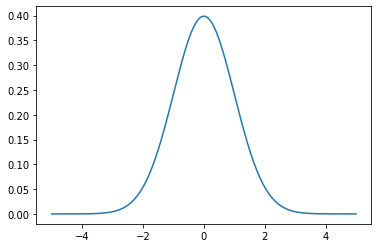

In [23]:
plt.plot(x, y)

Зависимость формы гауссиана от параметров

In [24]:
mu_sigma_array = [(0, 1, 'mu=0, sigma=1'), (0, 4, 'mu=0, sigma=4'), (-1, 0.5, 'mu=-1, sigma=0.5'), (2, 0.5, 'mu=2, sigma=0.5')]

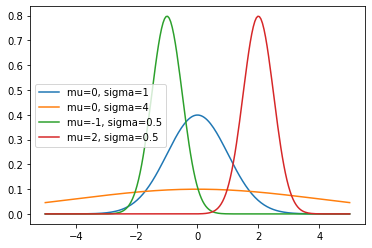

In [25]:
for mu, sigma, label in mu_sigma_array:
    y = build_gaussian_for_plot(x, mu, sigma)
    plt.plot(x, y, label=label)
plt.legend()

## Определение матожидания и дисперсии

$$
\hat{\mu} = \frac{1}{N}\sum_{i=1}^N x_i
$$

$$
\hat{\sigma} = \frac{1}{N}\sum_{i=1}^N (x_i-\hat{\mu})^2
$$

Сгенерируем массив точек нормального распределения

In [26]:
x = np.random.normal(loc=2.5, scale=1.5, size=100)
x

array([ 3.03038228,  3.66112803,  2.94889742,  3.33529342,  2.51351994,
        1.67153074,  2.77190328,  5.11923885,  2.6581472 ,  2.38767164,
        3.96782072,  1.86655688,  1.20080255,  1.39829154,  3.67468212,
        2.28625671,  5.31061525,  4.8261898 ,  3.05743573,  3.81069273,
        3.01811939,  2.50751744,  1.80378185,  2.74261378,  1.51784449,
        3.8717003 ,  5.05309379,  1.4368099 ,  3.17339108,  2.35986508,
        2.95104739,  0.63989749,  2.47152536,  3.45474866,  1.74767195,
        2.58169627,  3.14916829,  2.40570874,  1.37827499,  2.19008054,
        3.97073086,  0.80828528,  4.90062592,  0.81481754,  1.91039018,
        3.0254085 ,  1.71156213,  3.22450702,  1.20196667,  3.96967531,
        1.22219022,  2.12169288,  3.64275209,  2.29338874,  2.83611477,
        4.7113064 ,  3.27830585,  4.06442356,  3.86800312,  1.40173392,
        2.52530197,  0.6704444 ,  2.22881302,  4.83766423,  2.48800446,
        2.49774501,  2.78374242,  3.27070394,  5.09656419,  4.84

In [27]:
def get_mu(x):
    N = len(x)
    return np.sum(x) / N   

In [28]:
mu=get_mu(x)
print('Mu: ', mu)

Mu:  2.8430463034337006


In [29]:
def get_sigma(x, mu):
    return np.sum( np.power( (x-mu), 2) ) / len(x)    

In [30]:
sigma = get_sigma(x, mu)
print('Sigma: ', sigma)

Sigma:  1.7502671739065159


# Многомерный гауссиан

$$
p(x) = det (2\pi\Sigma)^{-1/2}exp\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\}
$$

$\Sigma$ - матрица ковариации

Построим график распределения плотности вероятности для двумерного гаусиана

$$
\Sigma =\left[
\begin{array}{cc}
  \sigma_{x_1}^2 & \sigma_{x_1}\sigma_{x_2} \\
  \sigma_{x_2}\sigma_{x_1} & \sigma_{x_2}^2
\end{array} \right]
$$




In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [33]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
Sigma = np.array([[0.7, 0.4], [0.4, 0.25]])
mu = np.array([0, 0])

In [34]:
def build_2d_gaussian_for_plot(x, y, mu, Sigma):
    Sigma_inv = np.linalg.inv(Sigma)
    Sigma_det = np.linalg.det(Sigma)
    
    X, Y = np.meshgrid(x, y)
    
    coef = 1.0 / ((2 * np.pi)**2 * Sigma_det)**0.5
    Z = coef * np.e ** (-0.5 * (Sigma_inv[0,0]*(X-mu[0])**2 + (Sigma_inv[0,1] + Sigma_inv[1,0])*(X-mu[0])*(Y-mu[1]) + Sigma_inv[1,1]*(Y-mu[1])**2))
    
    return X, Y, Z
    

In [35]:
X, Y, Z = build_2d_gaussian_for_plot(x, y, mu, Sigma)

In [36]:
def plot_2d_gaussian(X, Y, Z):
    fig = plt.figure()
    
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', linewidth=0)
        
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
    
    plt.show()

C:\python\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  


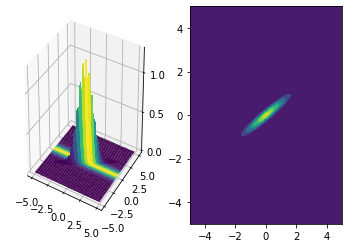

In [37]:
plot_2d_gaussian(X, Y, Z)

### Оценка параметров

In [49]:
x = np.random.normal(loc=2.5, scale=1.5, size=100)
y = np.random.normal(loc=1, scale=3, size=100)
mu_x = np.sum(x) / len(x)
mu_y = np.sum(y) / len(y)

mu_x, mu_y

(2.2953016311918946, 0.9927079742993301)

In [56]:
X = np.c_[x, y]
mu = [mu_x, mu_y]

In [62]:
s = 0
for i in range(len(X)):
    s += np.matmul( (X-mu).T, (X-mu) )
Sigma = s / len(X)**2
Sigma

array([[2.18222113, 1.2595452 ],
       [1.2595452 , 9.96583862]])

# Теорема Байеса


$$
p(x|y) = \frac{p(y|x)p(x)}{p(y)}
$$

Будем рассматривать $x$ как предположение о состоянии, $y$ - как измерение:



## Байесовский ниндзя

Есть ниндзя-математик, который очень не любит перепелов. Перепел прячется в кустах, а ниндзя сидит на дереве рядом. Ниндзя может одним решительным прыжком на перепела сразить его, но он не знает где точно находится перепел.

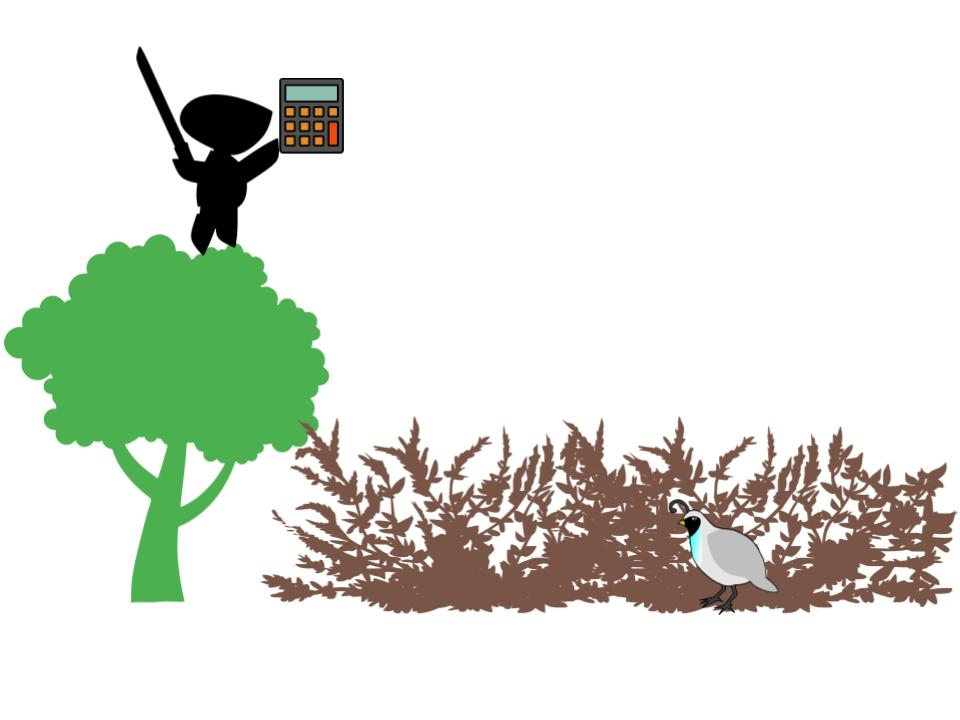

In [74]:
%matplotlib inline
from IPython.display import Image
Image('ninja.jpeg', width=500)

### Одномерный случай

$$
f_{posterior}(x) = \frac{f_{prior}(x)f_{meas}(x)}{\int f_{prior}(x)f_{meas}(x)dx},
$$

где $f_{posterior}(x)$  - уточненное распределение

$f_{prior}(x)$ - распределение до измерения

$f_{meas}(x)$ - распределение модели измерения

Будем считать, что модель измерения известна заранее:
$$
f_{meas}(x) = pdf(x=y, \mu=x, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp \{-\frac{(y-x)^2}{2\sigma^2} \}
$$

где
$\mu$ - математическое ожидание,

$\sigma$ - среднеквадратическое отклонение,

$y$ - измеренная величина

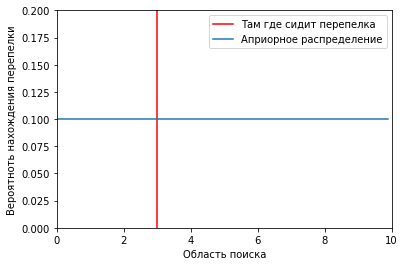

In [69]:
import matplotlib.pyplot as plt

quail= 3  # where the quail is hiding
D_X = 0.1                                                                           
X_MIN = 0
X_MAX = 10
SEARCH_AREA = np.arange(X_MIN, X_MAX, D_X)

# Prior uniform distribution
prior=np.ones(len(SEARCH_AREA))
prior=prior/(np.sum(np.sum(prior)) * D_X)

fig, ax = plt.subplots()
ax.plot([quail, quail], [0, 1],  c='red', alpha=1, label = "Там где сидит перепелка")
ax.plot(SEARCH_AREA, prior, label = "Априорное распределение")
ax.set(xlim=(X_MIN, X_MAX), ylim=(0, 2 * np.max(prior)))
ax.set_xlabel("Область поиска")
ax.set_ylabel("Вероятноть нахождения перепелки")
ax.legend()
plt.show()

В процессе наблюдения (ниндзя славились своей выдержкой) были получены $N=100$  замеров (гипотез) местонахождения. К тому же ниндзя знал дисперсию измерения положения перепелки по крику $\sigma^2=4$ .

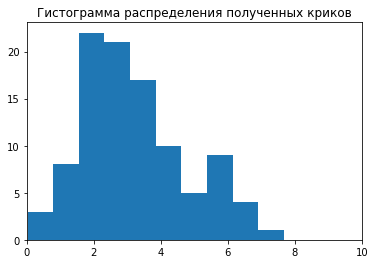

In [70]:
N = 100  # number of squawk
SD = 2
squawks = SD * np.random.randn(N) + quail # Vector with squawks measurement results

fig, ax = plt.subplots()

ax.hist(squawks)
ax.set(xlim=(X_MIN, X_MAX), title='Гистограмма распределения полученных криков')
plt.show()

In [71]:
from scipy.stats import norm

def bayes_formula(prior, y):
    numerator = []
    for i in range(len(SEARCH_AREA)):
        numerator.append(prior[i] * norm.pdf(x=y, loc=SEARCH_AREA[i], scale=SD))
    return numerator/np.sum(numerator)

posteriors = [prior]  # Список функций плотностей распределения от опыта к опыту

for squawk in squawks:
    prior = posteriors[len(posteriors)-1]
    posterior = bayes_formula(prior=prior, y=squawk)
    posteriors.append(posterior)

Анимация изменения распределения функции плотности вероятности

MovieWriter matplotlib.animation.PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


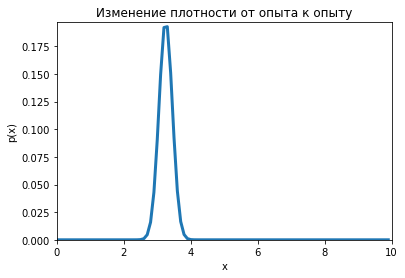

In [73]:
%matplotlib inline

from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()                    
ax.set(xlim=(X_MIN, X_MAX), ylim=(0, np.max(posteriors)), title='Изменение плотности от опыта к опыту')
ax.set_xlabel("x")
ax.set_ylabel("p(x)")
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(SEARCH_AREA, posteriors[i])
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=N, interval=80, blit=True)
anim.save('posteriors.gif', writer='matplotlib.animation.PillowWriter')

### Двумерный случай

Формула Байеса

$$
f_{posterior}(X) = \frac{f_{prior}(X)f_{meas}(X)}{\int f_{prior}(X)f_{meas}(X)dX}
$$

$$
X=\left(
    \begin{matrix}
        x \\
        y
    \end{matrix}
 \right)
$$

Модель измерений

$$
f_{meas}(X) = \frac{1}{\sqrt{\det 2\pi\Sigma}}\exp \{-\frac{1}{2}(x-y)^T(x-y) \}
$$

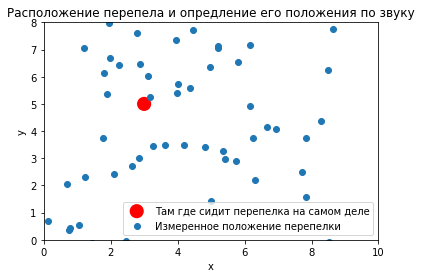

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [78]:
N = 100  # Number of squawks (experiences)
quail = [3, 5] # where the quail is hiding

# Ковариационная матрица измерений
K=[[2**2, 0    ],
   [0,     2**2]]

squawks = []
for i in range(N):
    x = K[0][0] * np.random.randn() + quail[0]
    y = K[1][1] * np.random.randn() + quail[1]
    squawks.append([x, y])
squawks = np.array(squawks)  

fig, ax = plt.subplots() 
ax.scatter([quail[0]], [quail[1]],  c='red', alpha=1, edgecolors='none', s=200, label = "Там где сидит перепелка на самом деле")

ax.set(xlim=(0, 10), ylim=(0, 8))
ax.set_title("Расположение перепела и опредление его положения по звуку")
ax.set_xlabel("x")
ax.set_ylabel("y")

sc = ax.scatter(squawks[0], squawks[1], label = "Измеренное положение перепелки")

def animate(i):
    storage = []
    for j in range(range(1, N)[i-1]):
        storage.append(squawks[j])
    sc.set_offsets(storage)
    return sc

anim = FuncAnimation(fig, animate, frames=N, interval=80, blit=False)
ax.legend(loc='lower right')

plt.show()
anim.save('top_view.gif', writer='imagemagick')
 

Теперь строим поверхность - вероятность нахождения перепела в квадрате. Распределение равномерное.

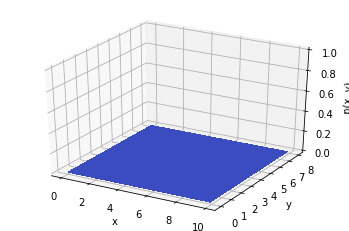

In [88]:
%matplotlib inline
# До опыта (априори) веротность нахождения перепела равномерна
search_area_x = np.arange(0, 10, 0.1) # Область поиска
search_area_y = np.arange(0, 8, 0.1) # Область поиска
prior=np.ones((len(search_area_y),len(search_area_x))) # Initialize all one --> uniform prior

prior=prior/np.sum(np.sum(prior))

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.set_zlim(0, 1)

s_x, s_y = np.meshgrid(search_area_x, search_area_y)
# Plot the surface.
ax1.plot_surface(s_x, s_y, prior, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('p(x, y)')
plt.show()

Применим Байесовскую итеративную оценку

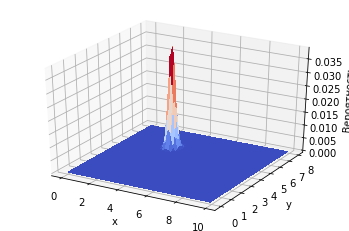

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [89]:
from math import *
from numpy import linalg as la

a, b = prior.shape
size = a * b
prior = prior.reshape(size)
search_area_x = s_x.reshape(size)
search_area_y = s_y.reshape(size)
search_area = []
for i in range(len(search_area_y)):
    search_area.append([search_area_x[i], search_area_y[i]])
search_area = np.array(search_area)
        
fig1 = plt.figure()
ax2 = fig1.gca(projection='3d')

def pdf2d(x, mu, k):
    xT = (x - mu).transpose()
    mul1 = np.dot(xT, la.inv(K))
    mul2 = np.dot(mul1, x - mu)
    return 1/(2*pi*sqrt(la.det(K))) * exp(-(1/2) * mul2)

posteriors = [prior]
for squawk in squawks:
    prior = posteriors[len(posteriors)-1]
    posterior = np.array(list(map(lambda exp_v, prior: pdf2d(x = squawk, mu=exp_v, k=K) * prior, search_area, prior)))
    posterior=posterior/np.sum(posterior)
    posteriors.append(posterior)
    
posterior = posterior.reshape(a, b)

surf = ax2.plot_surface(s_x, s_y, posterior, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Вероятность')
plt.show()
anim.save('top_view.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


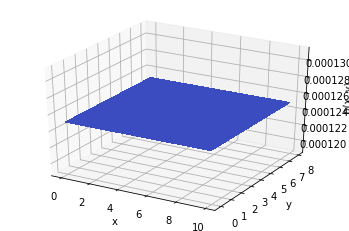

In [90]:
import matplotlib.animation as animation

fig2 = plt.figure()
ax3 = fig2.gca(projection='3d')


plot = ax3.plot_surface(s_x, s_y, posterior, cmap=cm.coolwarm, linewidth=0, antialiased=False)

def animate(i):
    ax3.clear()
    posterior = posteriors[i].reshape(a, b)
    plot = ax3.plot_surface(s_x, s_y, posterior, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_zlabel('p(x, y)')
    return plot,

pam_ani = animation.FuncAnimation(fig2, animate, frames=N, interval=120, blit=False)
pam_ani.save('posteriors2.gif', writer='imagemagick')